# Lab 3: Part 1 - Transforming sounds and images with convolutional representations; Part 2 - Markov models for text and music generation
## Pre-lab: How to use a Jupyter Notebook

Welcome to Lab 1! What you're looking at right now is a Jupyter Notebook, hosted on GitHub, running on Berkeley's Datahub service. What this means is that all the code in this file is hosted remotely, not on your computer. Therefore, you don't need to perform any setup on your computer to get this running! 

A notebook is a series of cells. Each cell can contain text (like this one) or code (like the one below). Any cell can be edited by double-clicking on it. A cell is run by pressing `shift` + `return`. Running a text cell exits the editing mode. Running a code cell runs the code and displays the output below the cell.

For this class, you will not need to edit any text or code cells (although you are welcome to if you'd like!). In lab, you will only need to run the cells we have created for you.

To make sure you know how to run cells, click on the code cell below and press `shift` + `return`. After running the cell, you should see the text `Hello, World!` underneath the cell.

In [1]:
print("Hello, World!")

Hello, World!


Now try running this next cell:

In [2]:
print("\N{VIOLIN} \N{MULTIPLE MUSICAL NOTES} \N{TRUMPET}")

🎻 🎶 🎺


If you see three musical emojis, then things are going well for you. **The following lab consists of code and text cells. Run each code cell (in the order presented) and read each text cell.** You don't need to run the text cells.

# Part 1: Transforming sounds and images with convolutional represenations
*(note: you won't see any output beneath the following code cell, but it's still important to run)*

In [3]:
%matplotlib inline
!pip install librosa
!pip install scikit-image
from skimage import io, color
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import signal
from ipywidgets import interact 

from IPython.display import Audio, display
import soundfile as sf
import librosa
import librosa.display
import numpy as np

def plot_audio(audio, sr):
    plt.figure(tight_layout=True)

    ax1 = plt.subplot(2,1,1)
    ax1.axis('off')
    plt.title('Waveform')
    librosa.display.waveshow(audio, sr=sr)

    ax2 = plt.subplot(2,1,2, sharex=ax1)
    plt.title('Spectrogram')
    stft = librosa.stft(audio)
    stft_db = librosa.amplitude_to_db(np.abs(stft))
    librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log')

## Blurring an Image
Let's explore blurring images using a kernel. A **kernel** is a matrix that can be used for image processing, such as blurring. To blur an image using a kernel we will perform a convolution between a kernel and an image. A **convolution** is a mathematical operation on two functions (in this case our two matrices) that produces a third function (our blurred image).

A **matrix** is a rectangular array of numbers arranged in horizontal rows and vertical columns. Below is an example of a 4 by 4 matrix where each value in the matrix is 1.

In [4]:
np.ones((4,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

First, let's import an image of a butterfly that we can work with.

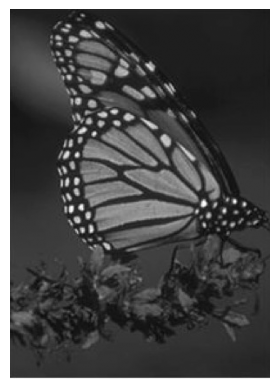

In [5]:
# Load image
butterfly = io.imread('assets/butterfly.jpg');

#convert to gray scale color map
gray_butterfly = color.rgb2gray(butterfly)

# Show image
plt.imshow(gray_butterfly, cmap='gray')
_ = plt.axis('off')

Now we will create a random 5 by 5 matrix that we can use as our kernel to blur the butterfly image. Try running the cell below a few times and you will see that each time it outputs a different randomly produced matrix (you can use `ctrl` + `return` to re-run the cell).

In [6]:
random_matrix = np.random.rand(5,5)
random_matrix 

array([[0.32289855, 0.7640176 , 0.13501024, 0.50556615, 0.7439842 ],
       [0.78623492, 0.56509858, 0.33269974, 0.59909811, 0.31100896],
       [0.37114533, 0.39854901, 0.00215157, 0.69691114, 0.91436969],
       [0.50779213, 0.72422417, 0.2937647 , 0.50477559, 0.22681388],
       [0.5338883 , 0.29797042, 0.97701611, 0.68649679, 0.16089957]])

Now we will convolve the image with the random matrix. Notice the difference between this and the original image. By convolving our image with a matrix of random values, we have blurred the image (*why does this happen ??* 🤔).

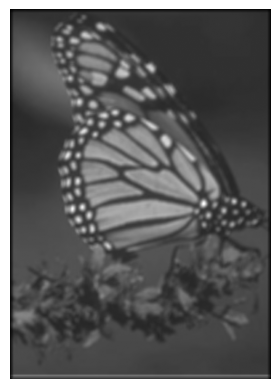

In [7]:
#using signal.convolve2d to blur butterfly
blurred_butterfly = signal.convolve2d(gray_butterfly, random_matrix)

#show blurred image
plt.imshow(blurred_butterfly, cmap='gray')
_ = plt.axis('off')

What would happen if we used a larger or smaller size matrix to blur the image? Move the slider below find out. What do you notice?

In [8]:
def SquareKernel(matrix_size):
    return np.random.rand(matrix_size, matrix_size)

def AdjustKernelRadius(matrix_size):
    fim = signal.convolve2d(gray_butterfly, SquareKernel(matrix_size))
    plt.imshow(fim, cmap='gray')
    plt.axis('off')
    plt.show()
interact(AdjustKernelRadius, matrix_size=(1,20))

interactive(children=(IntSlider(value=10, description='matrix_size', max=20, min=1), Output()), _dom_classes=(…

<function __main__.AdjustKernelRadius(matrix_size)>

-----

## Edge Detection 

Now we will attempt to use convolution to detect the edges in an image.

First, let's take a look at our image

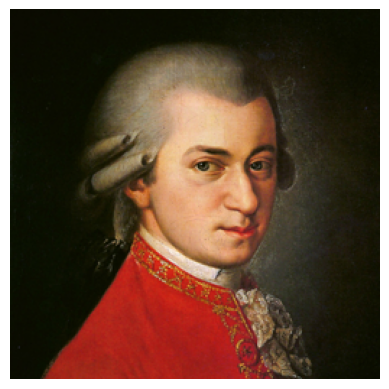

In [9]:
%matplotlib inline

image = plt.imread('assets/mozart.png')
plt.imshow(image)
_ = plt.axis('off')

And let's see the dimensions of our matrix

In [10]:
print("The dimensions of our matrix are: ", image.shape)

The dimensions of our matrix are:  (256, 256, 3)


The matrix has the shape 256 by 256 by 3. This means the image is 256 pixels by 256 pixels, and each pixel is represented by 3 values: the red, green, and blue values.

As we saw in the previous example, a grayscale image is stored as a two-dimensional matrix, where each entry in the matrix corresponds to the intensity of a single pixel of the image. A color image is stored as a three-dimensional matrix, since each pixel requires not just one intensity value, but three: one for red, one for green, and one for blue.

However, our input matrix must be two dimensional in order to be convolved with a two dimensional kernel. Therefore, our first step is to reduce the color image to a grayscale image, which essenitally "flattens" the three-dimensional matrix into two dimensions.

We will now apply a function to reduce our matrix to two dimensions.

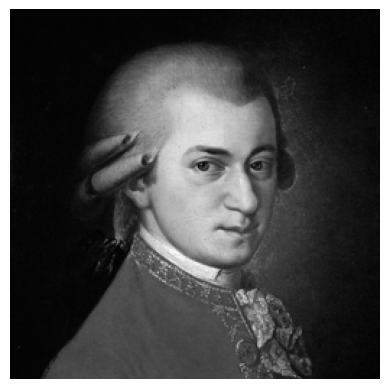

In [11]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

image_gray = rgb2gray(image)
plt.imshow(image_gray, cmap='gray')
_ = plt.axis('off')

Now let's check the dimensionality (shape) of our grayscale image.

In [12]:
image_gray.shape

(256, 256)

As we expected, our image is now represented as a two-dimensional matrix. It is still the same number of pixels (256 by 256), but there is no third dimension for RGB values. We are now ready to convolve our image with a kernel.

For edge detection, we will convolve our image with two different kernels, and then combine the results. One kernel will identify vertical edges and the other will identify horizontal edges. These matrices approximate the derivative; a large derivative means a large change, which is likely to be an edge. The specific matrices we are using are known as the [Sobel operators](https://en.wikipedia.org/wiki/Sobel_operator).

In [13]:
sobel_x = np.array(
    [[1, 0, -1],  
    [2, 0, -2],  
    [1, 0, -1]])
sobel_y = np.array(
    [[1, 2, 1], 
    [0, 0, 0], 
    [-1, -2, -1]])

print("sobel_x")
print("------------------")
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in sobel_x]))
print("------------------\n")
print("sobel_y")
print("------------------")
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in sobel_y]))
print("------------------")


sobel_x
------------------
1	0	-1
2	0	-2
1	0	-1
------------------

sobel_y
------------------
1	2	1
0	0	0
-1	-2	-1
------------------


Now we will convolve our image with each matrix, and view the results.

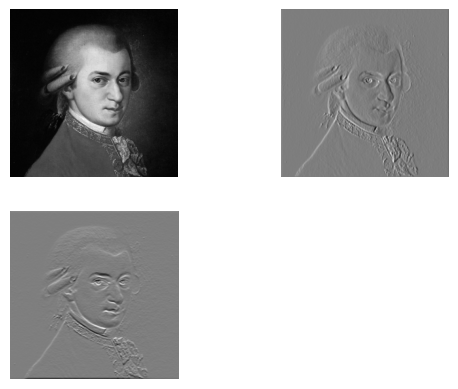

In [14]:
gradient_x = signal.convolve2d (image_gray, sobel_x)
gradient_y = signal.convolve2d (image_gray, sobel_y)

plt.subplot(2, 2, 1)
plt.imshow (image_gray, cmap="gray")
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow (gradient_x, cmap="gray")
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow (gradient_y, cmap="gray")
_ = plt.axis('off')


Finally, we combine our x and y gradients to get the overall gradient of the image, and our edge detection is complete!

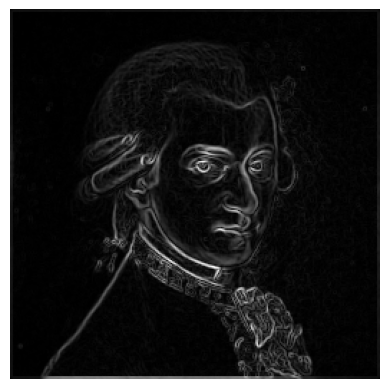

In [15]:
gradient = np.sqrt(np.square(gradient_x) + np.square(gradient_y))
gradient *= 255.0 / gradient.max()
plt.imshow (gradient, cmap='gray')
_ = plt.axis('off')

## Convolution Reverb

In this section we will again perform convolutions, but on audio instead of images. Audio can be represented as a one-dimensional matrix, which is just a list, where each value in the matrix is the value of the signal at a given time. These values range from -1 to 1.

We'll start by loading in the two sound files we will be working with. The first recording, `anechoic1.wav`, is a dry (reverb-free) recording of the Overture from Mozart's *The Marriage of Figaro*. The second sound file, `Concertgebouw-m.wav`, is a recording from the Concertgebouw, a concert hall in Amsterdam, Netherlands. This recording captures the acoustics of the concert hall and will serve as our impulse response. 

In [16]:
mozart, mozart_sr = sf.read('assets/anechoic1.wav')
impulse, impulse_sr = sf.read('assets/Concertgebouw-m.wav')
print("Length of mozart recording in number of samples:", mozart.shape, "Sampling rate:", mozart_sr)
print("Length of impulse response in number of samples:", impulse.shape, "Sampling rate:", impulse_sr)        

assert mozart_sr == impulse_sr, 'sample rate must be the same in both files'

Length of mozart recording in number of samples: (456621,) Sampling rate: 44100
Length of impulse response in number of samples: (225298,) Sampling rate: 44100


Listen to the two audio files:

In [17]:
print("Mozart recording:")
display(Audio(mozart, rate=mozart_sr))

print("Impulse response:")
display(Audio(impulse, rate=impulse_sr))

Mozart recording:


Impulse response:


And let's view the waveform of each sound:

Mozart recording:


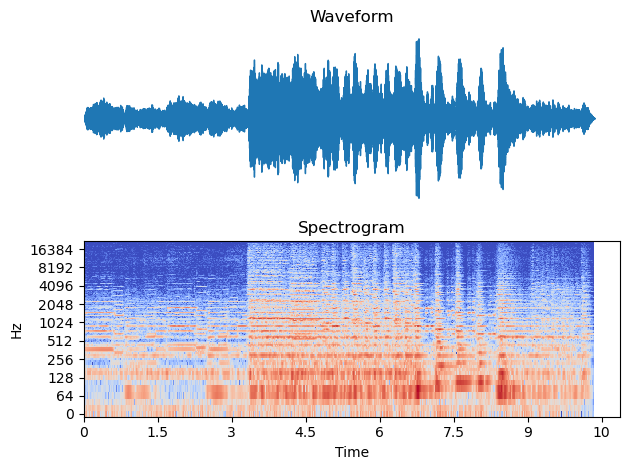

In [18]:
print("Mozart recording:")
plot_audio(mozart, mozart_sr)
Audio(mozart, rate=mozart_sr)

Impulse response:


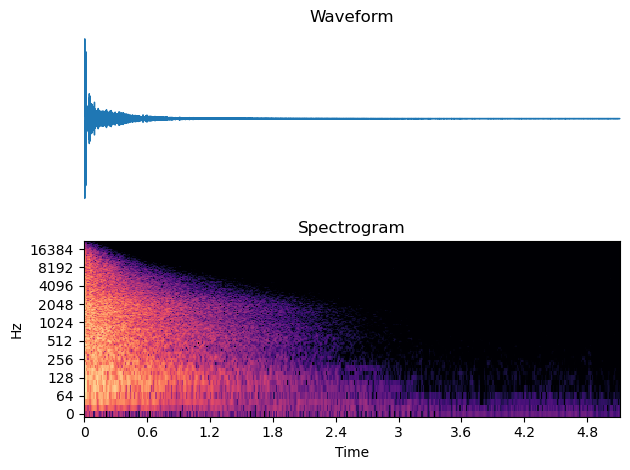

In [19]:
print("Impulse response:")
plot_audio(impulse, impulse_sr)
Audio(impulse, rate=impulse_sr)

-----

Now that we are familiar with our inputs, let's review how convolution with audio files works.

Convolution with signals is similar to convolution with images as we did above, except now we are working in only one dimension instead of two. In this context, we can think of convolution as "applying" one signal to another. We are applying the reverb of the Concert Gebouw to the Mozart recording.

With sound files, our domain becomes time which enables us to use the Convolution Theorem. The theorem states that convolution in the time domain is the same as complex multiplication in the frequency domain. In other words, multiplying the frequency content (spectra) of two signals is the same as performing convolution. So, 

$$ y(t) = x(t) * h(t) = IFFT(X(k)H(k)) $$ 

where $X(k)$ and $H(k)$ are frequency representations of the signals $x$ and $h$, and $y$ is our convolved signal.

To apply the impulse response to the Mozart recording, we will perform the following steps that take advantage of the Convolution Theorem:
1. Transform each signal into its frequency representation (spectrum) using the Fast Fourier Transform (FFT)
2. Multiply the two spectra together
3. Convert the resulting spectrum back into a time domain signal using the Inverse Fast Fourier Transform (IFFT)


In [20]:
def next_power_of_2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()

mozart_len = mozart.size
impulse_len = impulse.size

# the FFT is most efficient when the length of the signal is a power of two
if mozart_len > impulse_len:
    N = next_power_of_2(mozart_len)
else:
    N = next_power_of_2(impulse_len)

# calculate the real part of the FFT for each signal 
mozart_fft = np.fft.rfft(mozart, N)
impulse_fft = np.fft.rfft(impulse, N)

# multiply the two signals
convolved = mozart_fft * impulse_fft

# use IFFT to convert to time domain signal
mozart_reverb = np.fft.irfft(convolved)

Audio(mozart_reverb, rate=mozart_sr)

We have used convolution to apply reverb to a dry recording, therefore recreating what the recording would sound like if played in the Concertgebouw. Now we will see that we can adjust the amount of reverb applied by adding back a percentage of the dry recording. Try changing the slider to listen to different amounts of reverb. When you set "wet" to 0, there is no reverb applied; when you set it to 1.0, full reverb is applied.

In [21]:
def mix_reverb(wet):
    return Audio(wet * mozart_reverb[0:mozart_len] + mozart * (1 - wet), rate=mozart_sr)
print("Reverb slider:")
interact(mix_reverb, wet=(0.0,1.0))

Reverb slider:


interactive(children=(FloatSlider(value=0.5, description='wet', max=1.0), Output()), _dom_classes=('widget-int…

<function __main__.mix_reverb(wet)>

## Deconvolution
Now that we have applied reverb to the dry Mozart recording, can we perform the inverse operation? That is, given a dry (reverb-free) and wet (reverb) version of the same sound, can we retrieve the impulse response that was applied to the dry signal to create the wet signal? This is possible through the process of deconvolution.

### Wiener Deconvolution

Recall the previous equation we used when performing covolution:

$$ y(t) = x(t)*h(t) = X(k)H(k) $$

where $X$ and $H$ are the Fourier transforms of the respective time signals $x$ and $h$.

We were able to apply reverb to the Mozart recording $x$ using an impulse response $h$ to create a version of the recording with reverb, $y$.

Now, let's pretend we no longer have access to $h$. We have $x$ and $y$ and would like to calculate $h$

Now, it's possible to calculate $h$ by performing a complex **division in frequency domain:**

$$ H(k) = \dfrac{Y(k)}{X(k)} $$

However, this method is impractical due to extreme senstivity to sounds, so we will be using a better way to retrieve $h$, called **Wiener Deconvolution**:


$$ W(k) = \dfrac{Y(k)\overline{X(k)}}{|X(k)|^2 + \sigma^2} $$

where $\overline{X(k)}$ is the conjugate of $X(k)$, and $\sigma = \lambda \max(|X(k)|)$, where $\lambda$ is a scaling factor

In [22]:
def next_power_of_2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()

y = mozart_reverb
x, srx = sf.read('assets/anechoic1.wav')


scale = 3

N = next_power_of_2(y.shape[0])   
ft_y = np.fft.fft (y, N)
ft_x = np.fft.fft (x, N)
v =  max(abs(ft_x)) * 0.0001

# resynthesis
ir_rebuild = np.fft.irfft(ft_y * np.conj (ft_x) / (v + abs (ft_x) ** 2))

sig_len = y.shape[0] - x.shape[0]
ir_rebuild = ir_rebuild[1:sig_len] * scale

Audio(ir_rebuild, rate=impulse_sr)

Although it's not perfect, we were able to recreate the impulse response of the Concertgebouw with suprising accuracy. Take a listen to the original impulse and the impulse we recreated:

In [23]:
print("Original impulse:")
display(Audio(impulse, rate=impulse_sr))

print("Recreated impulse:")
display(Audio(ir_rebuild, rate=impulse_sr))

Original impulse:


Recreated impulse:


# Part 2: Markov models for text and music generation

------------
### Markov Chain Review

Recall Markov chains from class: Given a series of states, a Markov chain models the probabilities of transitioning from one state to the next. This can be done through "training" the Markov chain on data about the different states, which leads to the a calculation of transition probabilities between each state. 

A *first-order Markov chain* uses only the current state to determine the next state. A *second-order Markov chain* uses the current and previous state to determine the next state. An *nth-order Markov chain* uses the previous *n* states to determine the next state.

In [24]:
!pip install midiutil
!pip install pretty_midi
!pip install music21

import markov
from midiutil import MIDIFile
import pandas as pd
import numpy as np
from time import time
from IPython.display import Audio, display
from pretty_midi import PrettyMIDI
from music21 import converter, stream, midi
import ipywidgets as widgets
from IPython.display import display, clear_output

## Text Generation

In this context, each state of the Markov chain is a word, and the transition probabilities are the probabilities of going from one word to the next. Consider this example diagram in which the arrows between states display the transition probabilties.

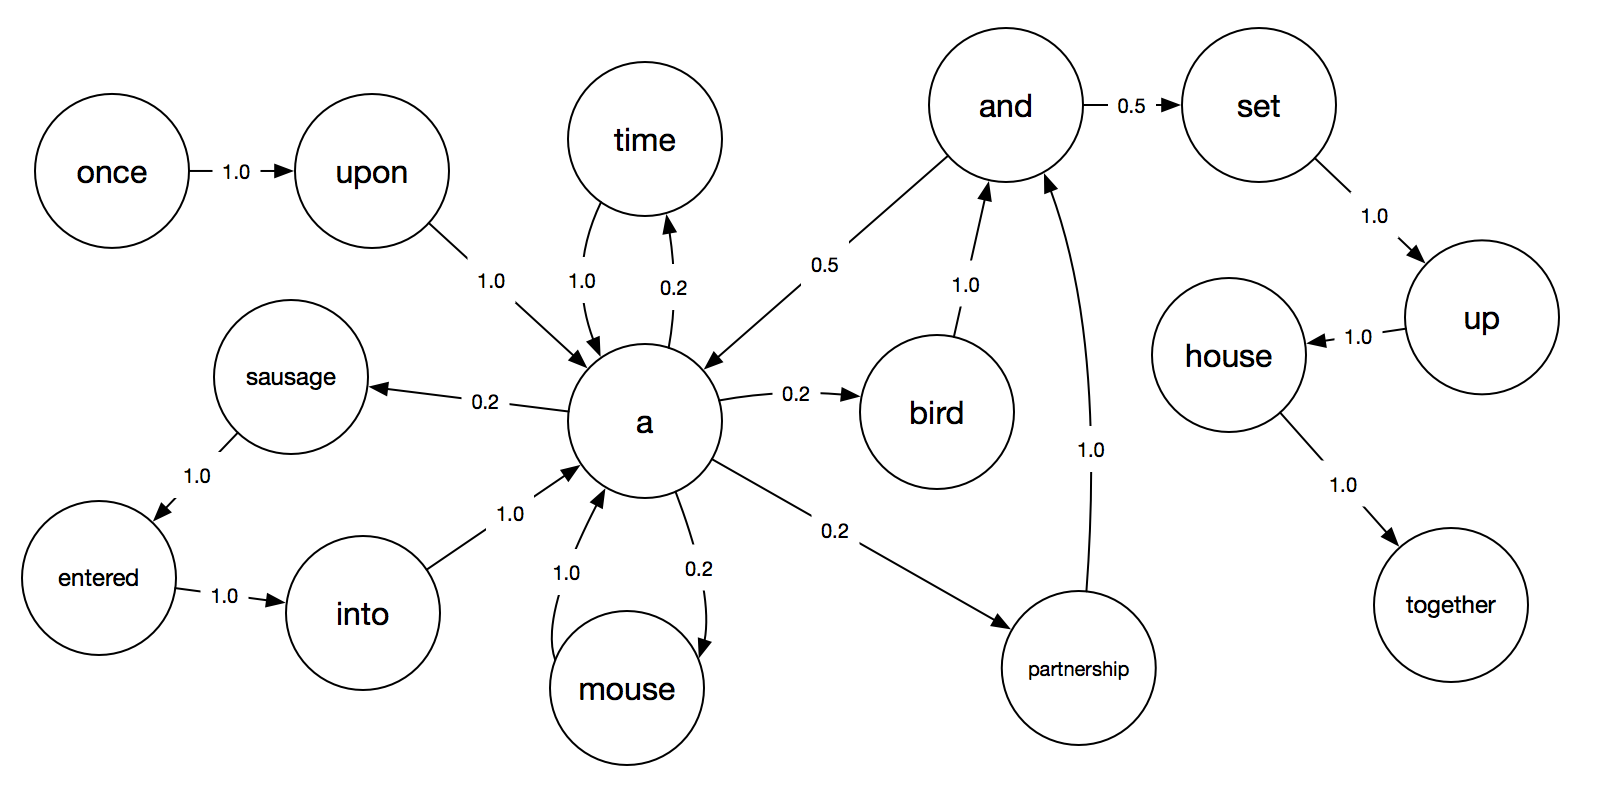
<sup>image: Aja Hammerly, thagomizer.com</sup>

We will train a Markov model on a single text file that includes text from *Alice in Wonderland* and *The Wizard of Oz*. You can take a look at the text below.

In [25]:
with open("assets/alice_oz.txt", 'r') as f:
    text = f.readline()

text

"Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, 'and what is the use of a book,' thought Alice 'without pictures or conversations?' So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her. There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, 'Oh dear! Oh dear! I shall be late!' (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked at it, and t

A first-order Markov chain would use the current word to determine the next word. For example, if the current state is the word "Alice", then some likely next words would be "was" and "had". 

A second-order Markov chain would use the current and previous word to determine the next word. If the current state is "had" and the previous state is "Alice", then a possible next state could be "been" or "no", since "Alice had been" and "Alice had no" occur multiple times in the text.

We will train our model by passing it one word at a time. In this way, it will learn the order of the words and the probability of each word given the word (or words) before it. Here's our text as an ordered list of words:

In [26]:
splitText = text.split()
splitText

['Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank,',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do:',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading,',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'conversations',
 'in',
 'it,',
 "'and",
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 "book,'",
 'thought',
 'Alice',
 "'without",
 'pictures',
 'or',
 "conversations?'",
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(as',
 'well',
 'as',
 'she',
 'could,',
 'for',
 'the',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'very',
 'sleepy',
 'and',
 'stupid),',
 'whether',
 'the',
 'pleasure',
 'of',
 'making',
 'a',
 'daisy-chain',
 'would',
 'be',
 'worth',
 'the',
 'trouble',
 'of',
 'getting',
 'up',
 'and',
 'picking',
 'the',
 'daisies,',
 'when',
 'suddenly',
 'a',
 'White',
 'Rabbit',
 'with',
 'pink',
 '

Now we can train our Markov model on the list of words and use it to generate new sentences! After running the next code block, specify the number of words you want to generate (max 500) and the order of the Markov chain. Then hit the generate button.

Try changing the order of the Markov chain. What do you notice about the resulting text? Which order Markov chain has the most convincing text output? 

Notice what happens when you set the order to be 4 or 5. Why do you think this happens?

In [27]:
def build_and_generate(num_words, order):
    c = markov.Chain(NPREF=order)
    c.build(splitText)
    if num_words == "": 
        return "Error: must set num_words"
    num_words = max(1, int(num_words))
    words = c.generate(nwords=num_words)
    return ' '.join(words)

# Create input widgets
num_words_widget = widgets.BoundedIntText(value=50, min=1, max=500, description="Num Words:")
order_widget = widgets.Dropdown(options=[1, 2, 3, 4, 5], value=2, description="Order:")

# Create a button widget
button = widgets.Button(description="Generate")

# Create an output widget
output = widgets.Output()

# Define a function to be called when the button is clicked
def on_button_click(b):
    with output:
        clear_output()  # Clear the previous output
        num_words = num_words_widget.value
        order = order_widget.value
        result = build_and_generate(num_words, order)
        print(result)

# Attach the function to the button's click event
button.on_click(on_button_click)

# Display the widgets and output
widgets.VBox([num_words_widget, order_widget, button, output])

------

## Audio Generation

Now let's try our hand at audio generation. We will use a dataset of chorales written by [Johann Sebastian Bach](https://en.wikipedia.org/wiki/Johann_Sebastian_Bach) which are known for their stylistic similarities.

First, a bit of background.

A chorale is a piece of music, written for choir, in which the melody is usually from a hymn that would be well known to the audience and performers. Chorales contain a series of chords of four voices, which are (from highest to lowest): soprano, alto, tenor, and bass. The soprano (highest) voice sings the melody, while the lower three voices create the harmony of the piece. Each chord in the piece can be identified by its **root**, which is the pitch the chord is built on (like C, F#, or A♭), and its **quality**, which describes both the relationship of the notes in the chord to each other, and the way the chord sounds. The four types of chord quality that are common in Bach chorales are major, minor, diminished, and augmented.

Listen to this Bach chorale, played on piano, to get a sense for the style. Pay particular attention to the harmonic material, as this is what we will try to replicate: [https://www.youtube.com/watch?v=L2cPibJzwbA&ab_channel=AndrewRemillard](https://www.youtube.com/watch?v=L2cPibJzwbA&ab_channel=AndrewRemillard)

If you want to listen to more chorales and see accompanying sheet music, see: [http://sporadic.stanford.edu/Chorales/](http://sporadic.stanford.edu/Chorales/)


### Data

Next take's take a look at the data. The dataset contains 60 chorales, and each chorale has roughly 100 chords in it.

The following code cell will display the first 100 rows of data. Each row corresponds to a single chord in the chorale.

The first column `choral_ID` tells us which chorale this is from. For the first 100 rows, all the data is from the same chorale: `000106b_`.

The next column `event_number` tells us the order of the chords in this chorale.

The next twelve rows, `pitch_1` ... `pitch_12` tell us which pitches are present in the chord. `pitch_1` is C, `pitch_2` is C#, and so on.

The `bass` column tells us which note is the bass note of the chord, which is the lowest note in the chord. This is important because in this style of music, the note of the chord that is in the bass can change the function of the chord in a progression. It is also common for the bassline to have a specific character and function compared to the other notes.

`meter` tells us the duration of that chord in number of beats.

Finally, `chord_label` tells us the root and quality of the chord. Most of the labels have the form `X_Y` where `X` is the root pitch of the chord (C, F, G#, Bb, etc.) and `Y` is the quality of the chord (`M` for major, `m` for minor, `d` for diminished, and `a` for augmented). For example, `C_M` is a C major chord, `D_m` is a D minor chord, `BbM` is a B-flat major chord.

In [28]:
df = pd.read_csv('assets/bach_choral_set_dataset.csv')
df.head(100)

choral_ID  event_number pitch_1 pitch_2 pitch_3 pitch_4 pitch_5 pitch_6  \
0   000106b_             1     YES      NO      NO      NO      NO     YES   
1   000106b_             2     YES      NO      NO      NO     YES      NO   
2   000106b_             3     YES      NO      NO      NO     YES      NO   
3   000106b_             4     YES      NO      NO      NO      NO     YES   
4   000106b_             5     YES      NO      NO      NO      NO     YES   
..       ...           ...     ...     ...     ...     ...     ...     ...   
95  000106b_            96     YES      NO      NO      NO     YES      NO   
96  000106b_            97     YES      NO      NO      NO     YES      NO   
97  000106b_            98     YES      NO      NO      NO      NO     YES   
98  000106b_            99     YES      NO      NO      NO     YES      NO   
99  000106b_           100     YES      NO      NO      NO     YES      NO   

   pitch_7 pitch_8 pitch_9 pitch_10 pitch_11 pitch_12 bass  meter chord_label  
0       NO      NO      NO      YES       NO       NO    F      3         F_M  
1       NO     YES      NO       NO       NO       NO    E      5         C_M  
2       NO     YES      NO       NO       NO       NO    E      2         C_M  
3       NO      NO      NO      YES       NO       NO    F      3         F_M  
4       NO      NO      NO      YES       NO       NO    F      2         F_M  
..     ...     ...     ...      ...      ...      ...  ...    ...         ...  
95      NO     YES      NO       NO      YES       NO    C      2        C_M7  
96      NO     YES      NO       NO      YES       NO    C      1        C_M7  
97      NO      NO      NO      YES       NO       NO    F      4         F_M  
98      NO     YES      NO       NO       NO       NO    E      5         C_M  
99      NO     YES      NO       NO       NO       NO    E      2         C_M  

[100 rows x 17 columns]

In order to create a Markov chain that can generate Bach chorales, we need to think about how we can represent our data.

### MIDI

[Musical Instrument Digital Interface (MIDI)](https://en.wikipedia.org/wiki/MIDI) is a common protocol used to represent musical notes and events in digital format. MIDI is used in many processes: music production software, live performance, generating music from scores, and more. All MIDI parameters have a value from 0 to 127. A variety of musical parameters can be communicated using MIDI, the most common being pitch and velocity (volume). For example, the note C4 in MIDI is represented as the number 60. C#4 is 61, D4 is 62, and so on. This is convenient for performing computation on pitch. For example, to get the same pitch but higher one octave, simply add 12 to the MIDI pitch value. We will use MIDI to represent pitch in our Markov chain.

### Generating music in the style of Bach

To generate a Bach chorale, we will train two different Markov models. The first will generate chords, and the second will generate the chord durations for our piece.

The first model will be trained on a `(chord, bass)` tuple, where `chord` is a list of MIDI pitches and `bass` is a single MIDI pitch that represents the pitch of the bass voice for that chord. The reason we separate the bass voice from the rest of the chord is because the bass line in Bach chorales determines the inversion of the chord, which has important functional consequences. We are able to do this because our dataset contains a row that specifies the bass pitch of each chord.

Our second model will determine how long each chord is held for. It is trained on the sequences of numbers gathered from the `meter` column.

In [29]:
import markov_bach

midi_note_converter = {'pitch_1':60,
             'pitch_2':61,
             'pitch_3':62,
             'pitch_4':63,
             'pitch_5':64,
             'pitch_6':65,
             'pitch_7':66,
             'pitch_8':67,
             'pitch_9':68,
             'pitch_10':69,
             'pitch_11':70,
             'pitch_12':71}


bass_converter = {'C': 48,
                  'C#': 49,
                  'Db': 49,
                  'D': 50,
                  'Eb': 51,
                  'D#': 51,
                  'E': 52,
                  'F': 53,
                  'F#': 54,
                  'G': 55,
                  'G#': 56,
                  'Ab': 56,
                  'A': 57,
                  'Bb': 58,
                  'A#': 58,
                  'B': 59
}

def string2int(chord):
    return [int(i) for i in chord.strip('[').strip(']').split(', ')]

def chord2midi(chord_bass_tuple):
    """
    Convert (chord name, bass note) tuple to a (chord as midi list, bass as midi note) tuple
    """
    chord, bass = chord_bass_tuple
    return chords[chord][bass], bass_converter[bass]

df = pd.read_csv('assets/encoded.csv')
note_columns = df.columns[2:14]

# the 'chords' dict maps a chord (F_M) to a dictionary, where the keys are bass notes. Each bass note maps
# to a single list of MIDI pitches that represent the notes in the chord
chords = {}
for i, row in df.iterrows():
    chord = row['chord_label']
    bass = row['bass']
    if chord not in chords:
        chords[chord] = {}
    if bass not in chords[chord].keys():
        notes = []
        for col in note_columns:
            if row[col] == 1:
                note = midi_note_converter[col]
                notes.append(note)
        chords[chord][bass] = str(notes)

Run the following cell to generate a Bach chorale!

In [30]:
def train_and_generate_bach(order, start_chord):
    
    start_bass = start_chord.split("_")[0]

    chord_model = markov_bach.Chain(NONWORD=(start_chord, start_bass), NPREF=order)
    meter_model = markov_bach.Chain(NONWORD=3, NPREF=order)

    # train on each chorales
    for chorale in df['choral_ID'].unique():
        d = df[df['choral_ID'] == chorale]  # select only the rows from a single chorale
        chord_stream = [(i['chord_label'], i['bass']) for k, i in d.iterrows()]  # sequential list of all chord/bass tuples
        chord_model.build(chord_stream)
        meter_stream = np.array(d['meter'], dtype='str')
        meter_model.build(meter_stream)

    # generate chords and durations
    generated_chords = chord_model.generate(first=(start_chord, start_bass))
    generated_meter = meter_model.generate(first=3)

    # convert chord names to midi note lists
    # generated_chords[i] is a tuple: (chord as midi list, midi bass note)
    generated_chords_midi = [chord2midi(x) for x in generated_chords]


    # create MIDI
    track = 0
    channel = 0
    time = 0
    duration = 1
    tempo = 60
    volume = 100

    MIDI = MIDIFile(1)

    t = 0

    start_c = string2int(chords[start_chord][start_bass])
    start_b = bass_converter[start_bass]
    duration = 4
    for c in start_c:
        MIDI.addNote(track, channel, c, t, duration, volume)
    MIDI.addNote(track, channel, start_b, t, duration, volume)
    t += duration

    for i in range(len(generated_chords_midi)):
        chord, bass = generated_chords_midi[i]
        chord = string2int(chord)
        duration = int(generated_meter[i])

        for note in chord:
            MIDI.addNote(track, channel, note, t, duration, volume)

        MIDI.addNote(track, channel, bass, t, duration, volume - 10)

        t += duration

    midi_file = 'generated_midi.mid'

    with open(midi_file, 'wb') as output_file:
        MIDI.writeFile(output_file)

    music = PrettyMIDI(midi_file=midi_file)
    audio = music.synthesize()

    return Audio(audio, rate=44100), converter.parse(midi_file)

### widget display:

import ipywidgets as widgets
from IPython.display import display, clear_output

# Sample list of chords and bass notes
chord_options = [("C Major","C_M"), ("C Minor","C_m"), ("A Major", "A_M"), ("F Minor","F_m")]

# Create Dropdown widgets for order, chord, and bass
order_dropdown = widgets.Dropdown(
    options=[1, 2, 3, 4, 5],
    value=3,
    description="Order:",   
)

chord_dropdown = widgets.Dropdown(
    options=chord_options,
    description="Starting Chord:",
    style={'description_width': 'initial'},  # Allow longer description
)

# Create a button widget
button = widgets.Button(description="Generate Music")

# Create an Output widget to display the generated music
output_widget = widgets.Output()

# Define a function to be called when the button is clicked
def on_button_click(b):
    with output_widget:
        clear_output(wait=True)  # Clear the output widget without clearing the dropdowns
        order_selected = order_dropdown.value
        chord_selected = chord_dropdown.value
        audio, score = train_and_generate_bach(order_selected, chord_selected)
        display(audio)
        score.show()

# Attach the function to the button's click event
button.on_click(on_button_click)

# Display the widgets and button
widgets.VBox([order_dropdown, chord_dropdown, button, output_widget])


What do you think of our Markov generated Bach chorales? Are they convincing?

It certainly is making music, but is it music in the style of Bach? Some of the qualities we expect are there, like the common V-I progression that often appears in the generated sequences. However, it isn't good enough to create a convincing recreation of Bach.

Markov chains have some promise when it comes to generating music and sound with data, but now we will take a look at a process that is much more convincing: neural networks. Check out the Bach Google doodle, which uses multiple neural networks to create pieces in Bach's style: [https://www.google.com/doodles/celebrating-johann-sebastian-bach](https://www.google.com/doodles/celebrating-johann-sebastian-bach)